In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [3]:
path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\Background\\tt'
files = np.linspace(0, 9, 10, dtype=int)
end = '.hdf5'
PSDs = np.zeros((len(files), 50001))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    fs = round(1/attrs['delta_t'])
    PSD = scisig.welch(data['channel_d'], fs=fs, nperseg=int(0.1*fs))
    PSDs[n] = PSD[1]
frequency = PSD[0]

PSD_avr_bg = sum(PSDs)/len(PSDs)

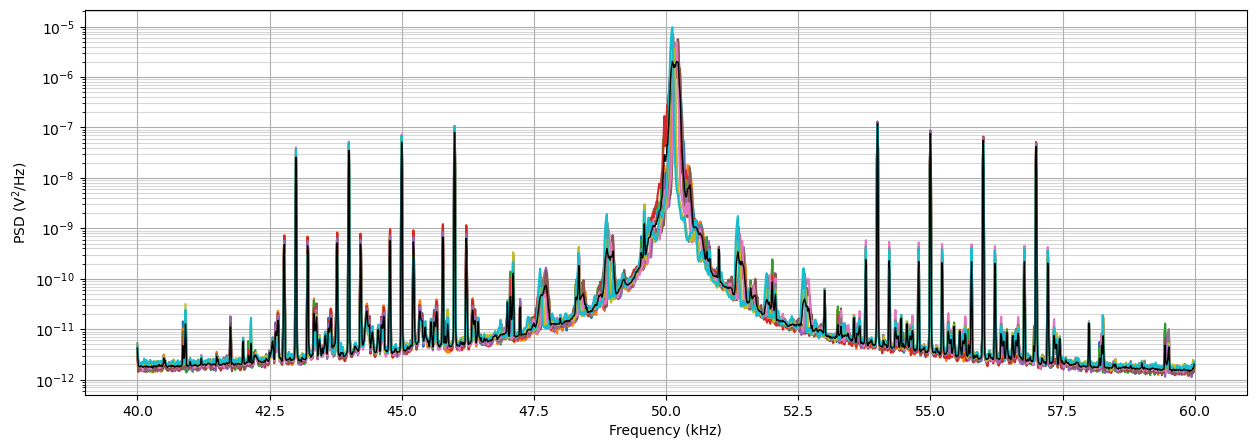

In [4]:
lb = 4000
ub = 6000
plt.figure(figsize = (15, 5))
for PSD in PSDs:
    plt.plot(frequency[lb:ub]/1000, PSD[lb:ub])
plt.plot(frequency[lb:ub]/1000, PSD_avr_bg[lb:ub], 'k', linewidth = 1)
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.grid()
plt.grid(which = 'minor', alpha = 0.5)

In [30]:
freqs = [43000, 44000, 45000, 46000, 54000, 55000, 56000, 57000]

path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\Background\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases = np.zeros((8, len(files)*10))
amps = np.zeros((8, len(files)*10))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for m, freq in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
            amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
            amps[m, 10*n+i] = amp
            phases[m, 10*n+i] = phase[1]

files = np.linspace(0, 49, 50, dtype=int)
positions = np.linspace(0, 15, 16, dtype=int)
phases_pos = np.zeros((len(positions), 8, len(files)*10))
amps_pos = np.zeros((len(positions), 8, len(files)*10))

for posind, position in enumerate(positions):
    path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\pos'+str(position)+r'\tt'
    end = '.hdf5'
    phases2 = np.zeros((8, len(files)*10))
    amps2 = np.zeros((8, len(files)*10))
    for n, file in enumerate(files):
        filename = path + str(file) + end
        data, attrs = au.load_data_lf(filename)
        for i in range(10):
            drive = data['channel_f'][i*10**6:(i+1)*10**6]
            drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
            fft_drive = np.fft.rfft(drive)
            fft_drive2 = np.fft.rfft(drive2)
            for m, freq in enumerate(freqs):
                phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                amps2[m, 10*n+i] = amp
                phases2[m, 10*n+i] = phase[1]
    phases_pos[posind] = phases2
    amps_pos[posind] = amps2

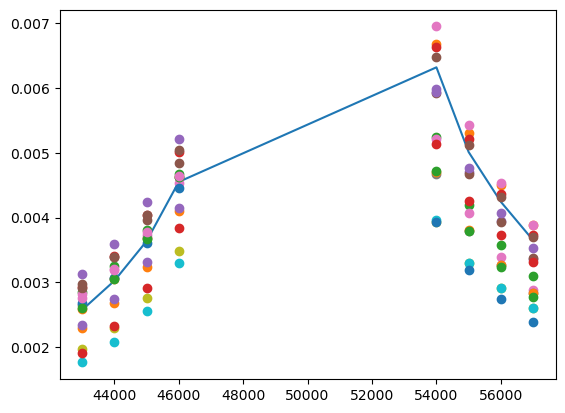

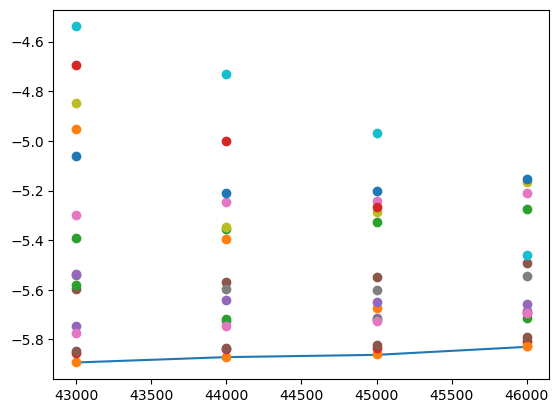

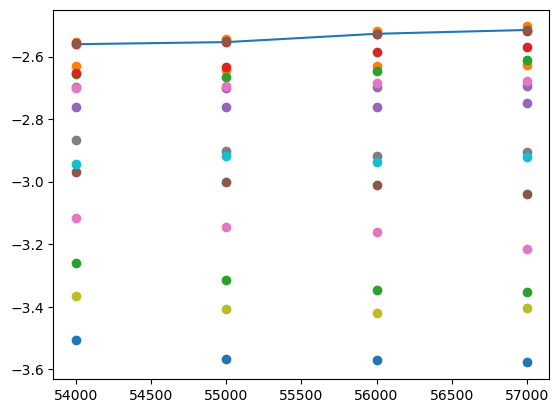

In [31]:
plt.plot(freqs, np.mean(amps, axis = 1))
for amp_pos in np.mean(amps_pos, axis = 2):
    plt.plot(freqs, amp_pos, 'o')

plt.figure()
plt.plot(freqs[:4], np.mean(phases, axis = 1)[:4])
for phase_pos in np.mean(phases_pos, axis = 2):
    plt.plot(freqs[:4], phase_pos[:4], 'o')

plt.figure()
plt.plot(freqs[4:], np.mean(phases, axis = 1)[4:])
for phase_pos in np.mean(phases_pos, axis = 2):
    plt.plot(freqs[4:], phase_pos[4:], 'o')

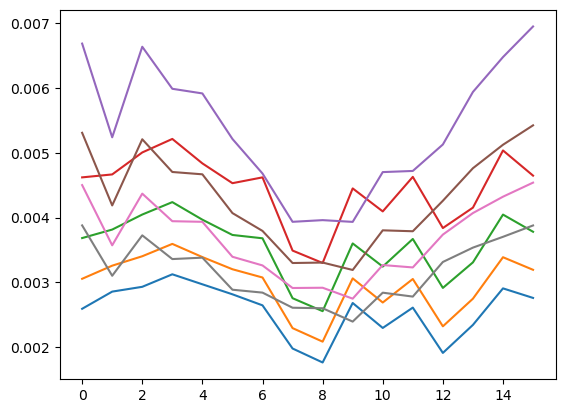

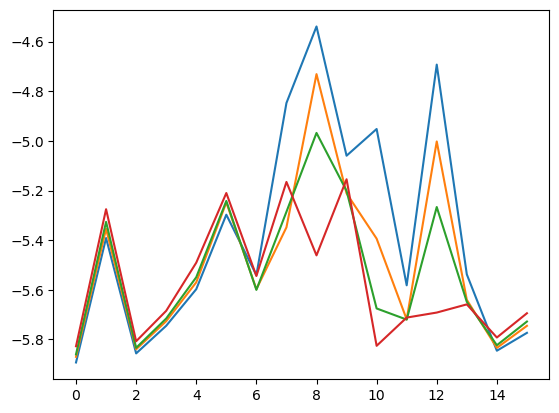

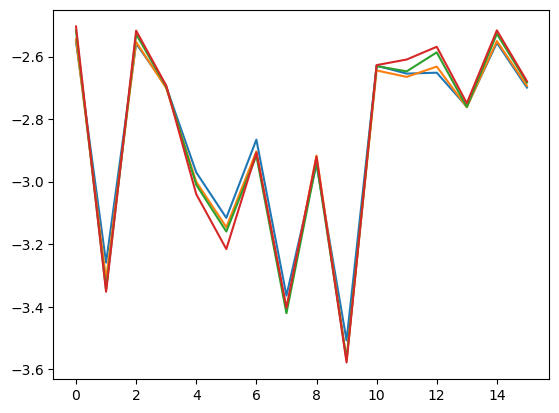

In [32]:
for i in np.transpose(np.mean(amps_pos, axis = 2)):
    plt.plot(positions, i)
plt.figure()
for i in np.transpose(np.mean(phases_pos, axis = 2))[:4]:
    plt.plot(positions, i)

plt.figure()
for i in np.transpose(np.mean(phases_pos, axis = 2))[4:]:
    plt.plot(positions, i)